# WeatherPy

---

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 653


In [11]:
# Set the API base URL"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1
units="metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_weather

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huadian
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | gorom-gorom
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ojinaga
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | bonfim
Processing Record 15 of Set 1 | tazovskiy
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | pimentel
Processing Record 18 of Set 1 | sibu
Processing Record 19 of Set 1 | port-gentil
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | fort nelson
Processing Record 22 of Set 1 | port lincoln
Processing 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huadian,42.9633,126.7478,-2.96,49,0,1.02,CN,1667592348
1,saint george,37.1041,-113.5841,12.46,29,0,1.54,US,1667592348
2,tuktoyaktuk,69.4541,-133.0374,-12.00,85,100,6.69,CA,1667592349
3,albany,42.6001,-73.9662,21.43,55,64,1.34,US,1667592349
4,gorom-gorom,14.4439,-0.2361,29.62,20,96,3.03,BF,1667592349


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huadian,42.9633,126.7478,-2.96,49,0,1.02,CN,1667592348
1,saint george,37.1041,-113.5841,12.46,29,0,1.54,US,1667592348
2,tuktoyaktuk,69.4541,-133.0374,-12.00,85,100,6.69,CA,1667592349
3,albany,42.6001,-73.9662,21.43,55,64,1.34,US,1667592349
4,gorom-gorom,14.4439,-0.2361,29.62,20,96,3.03,BF,1667592349


### Create the Scatter Plots Requested



#### Latitude Vs. Temperature

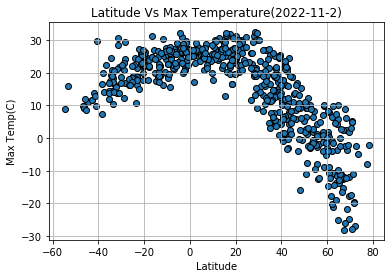

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title("Latitude Vs Max Temperature(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Latitude Vs Humidity**

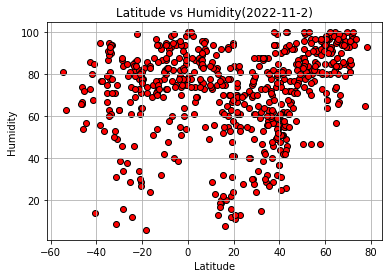

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="Red",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Latitude Vs Cloudiness**

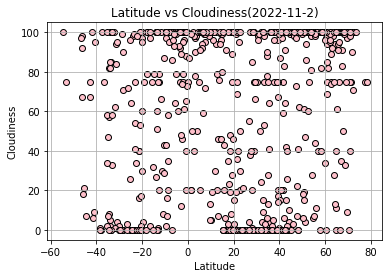

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="Pink",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Latitude Vs Wind Speed**


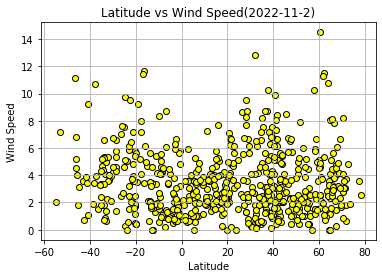

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="Yellow",edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed(2022-11-2)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

**Compute Linear Regression for Each Relationship**


In [35]:
# Define a function to create Linear Regression plots
## Add the linear regression equation and line to plot
def linregres(x_values, y_values,x,y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


    regress_values = x_values * slope + intercept #List of predicted y values

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
    print(f"r value is {rvalue}")

    plt.scatter(x_values,y_values,edgecolors="black")

    plt.plot(x_values,regress_values,"r-",label=line_eq)
    
    plt.legend(loc="lower left")

    plt.xlabel(x) #plt.annotate(line_eq,(0,40),fontsize=15,color="red") #add in regression equation
    plt.ylabel(y)

    plt.show()


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huadian,42.9633,126.7478,-2.96,49,0,1.02,CN,1667592348
1,saint george,37.1041,-113.5841,12.46,29,0,1.54,US,1667592348
2,tuktoyaktuk,69.4541,-133.0374,-12.00,85,100,6.69,CA,1667592349
3,albany,42.6001,-73.9662,21.43,55,64,1.34,US,1667592349
4,gorom-gorom,14.4439,-0.2361,29.62,20,96,3.03,BF,1667592349


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,punta arenas,-53.1500,-70.9167,16.06,63,75,7.20,CL,1667592225
11,bambous virieux,-20.3428,57.7575,22.34,80,100,1.76,MU,1667592352
12,bredasdorp,-34.5322,20.0403,17.13,95,82,1.81,ZA,1667592352
15,mar del plata,-38.0023,-57.5575,19.90,77,0,10.73,AR,1667592353
16,pimentel,-6.8367,-79.9342,21.16,60,0,8.75,PE,1667592354


###  Temperature vs. Latitude Linear Regression Plot

r value is -0.8411960717272715


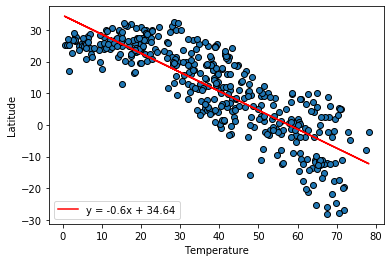

In [38]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"Temperature","Latitude")

r value is 0.6938306288510614


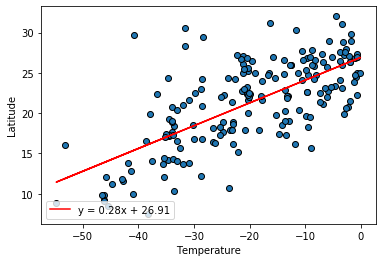

In [39]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Temperature","Latitude")

### Humidity vs. Latitude Linear Regression Plot

r value is 0.3462499473066062


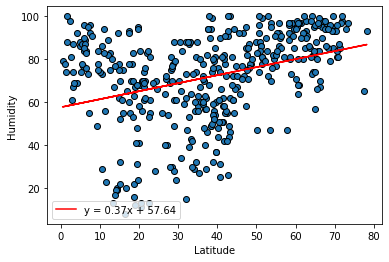

In [40]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"Latitude","Humidity")

r value is 0.195046431814092


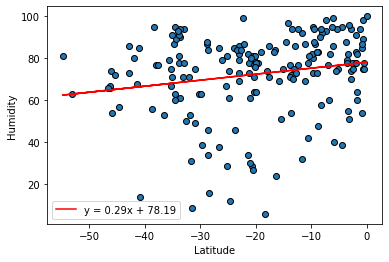

In [41]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity")

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.15315259026063888


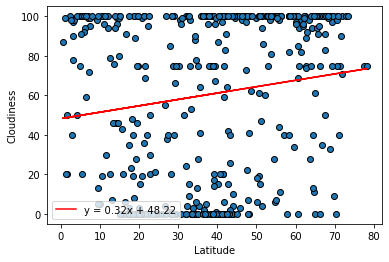

In [42]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

r value is 0.252404093150063


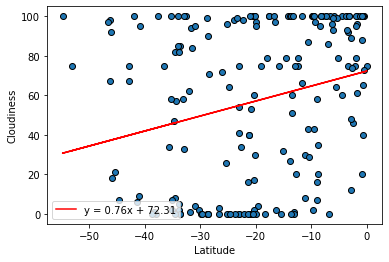

In [43]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness")

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.06181201138268631


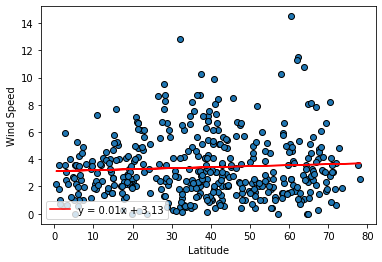

In [44]:
# Northern Hemisphere
linregres(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"Latitude","Wind Speed")

r value is -0.232377699141761


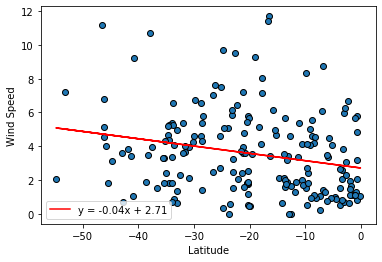

In [45]:
# Southern Hemisphere
linregres(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed")